In [3]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Larger figures

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas as pd
import numpy as np


# Exercise #1

===========

Create a plot displaying the test error resulting from random forests on the Boston data set for a comprehensive range of values for the number of trees and the number of selected features. 

For this practice we will make use of the Boston Dataset, which is included into the sklearn datasets. 
The Boston dataset consists of 506 rows and 14 columns. The goal is to predict the MEDV variable.

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's


Let's load the dataset and split it into training and test

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
from sklearn.model_selection import train_test_split

def split_df(dataframe, seed=None, percentage=0.8):
    
    X = dataframe.loc[:, dataframe.columns != 'MEDV']
    y = dataframe['MEDV']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed)

X_train, X_test, y_train, y_test = split_df(df, seed=42, percentage=0.5)

Now we can create our first decision tree. The basic DT is implemented in sklearn in the DecisionTreeClassifier and Regressor. As we are trying to predict a numerical value, we will make use of the latter. You can take a look to its configuration and hyperparameters in the following link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

For the practice we will use the default parameters.

In [6]:
from sklearn.tree import DecisionTreeRegressor

boston_tree = DecisionTreeRegressor(random_state=42)
boston_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Let's take a look to the performance of the classifier.

In [7]:
from sklearn.metrics import mean_squared_error
predictions = boston_tree.predict(X_test)
print("MSE = {0:.4f}".format(mean_squared_error(y_test, predictions)))

MSE = 29.1518


We can also make sense of the quality of the predictions by plotting the predictions against the actual values

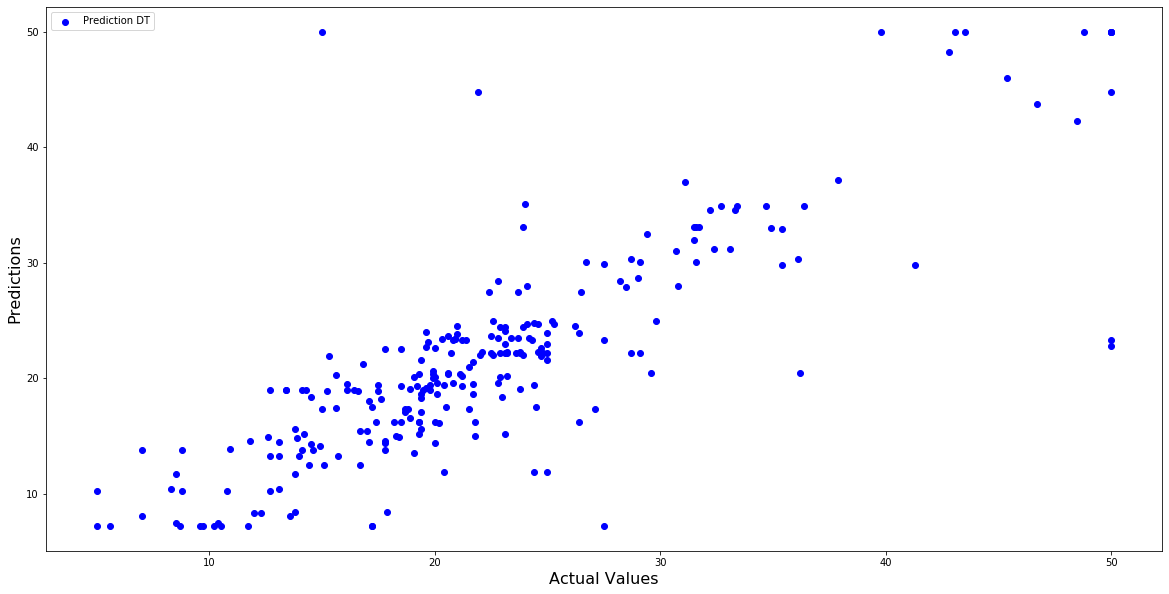

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(y_test,boston_tree.predict(X_test),color='blue',label='Prediction DT')
plt.xlabel("Actual Values", fontsize=16)
plt.ylabel("Predictions", fontsize=16)
plt.legend(loc='upper left')

Now we will take a look to the tree itself. This is a bit complex since sklearn does not provide a way to visualize the models. To that end, we will need to make use of an external library: `pydotplus`.

In [9]:
# Install the library

! pip install pydotplus

awscli 1.16.161 requires rsa<=3.5.0,>=3.1.2, which is not installed.
thinc 6.10.3 requires msgpack<1.0.0,>=0.5.6, which is not installed.
spacy 2.0.11 requires pathlib, which is not installed.
msgpack-numpy 0.4.4.3 requires msgpack>=0.5.2, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
awscli 1.16.161 has requirement botocore==1.12.151, but you'll have botocore 1.12.199 which is incompatible.
tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.1.0 which is incompatible.
spacy 2.0.11 has requirement regex==2017.4.5, but you'll have regex 2017.11.9 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/home/acastellanos/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


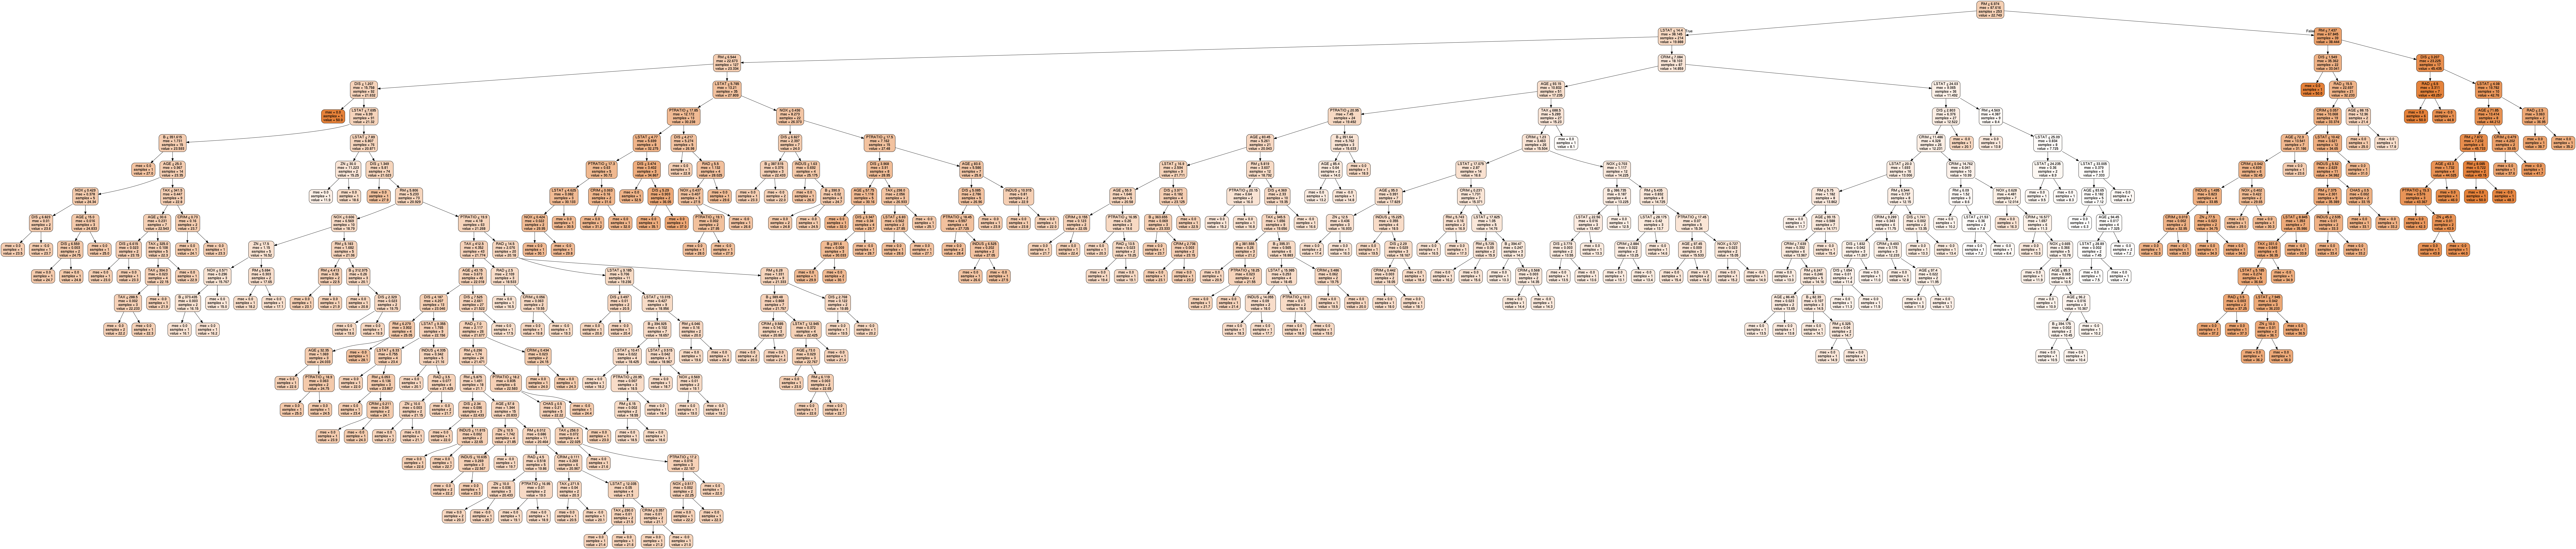

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def plot_tree(tree, feature_names, class_name):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=feature_names, class_names=[class_name],
                    filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

plot_tree(boston_tree, X_train.columns, "MEDV")

Two aspects can be highlighted after taking a look at the tree:
 - The tree is huge! As we have not set any complexity pruning or max_depth we have allow the tree to grow without any limit
 - `RM` and `LSTAT` seem to be the most important features in order to predict the value of the houses. The variable `RM` measures the number of rooms (i.e., the size of the house). The tree indicates that larger houses correspond to more expensive houses. The `LSTAT` (the percentage of individuals with lower socioeconomic status) indicates that houses in expensive neighborhoods are more expensive

We can confirm this later point by plotting the feature importance

Text(0.5, 1.0, 'Feature Importance')

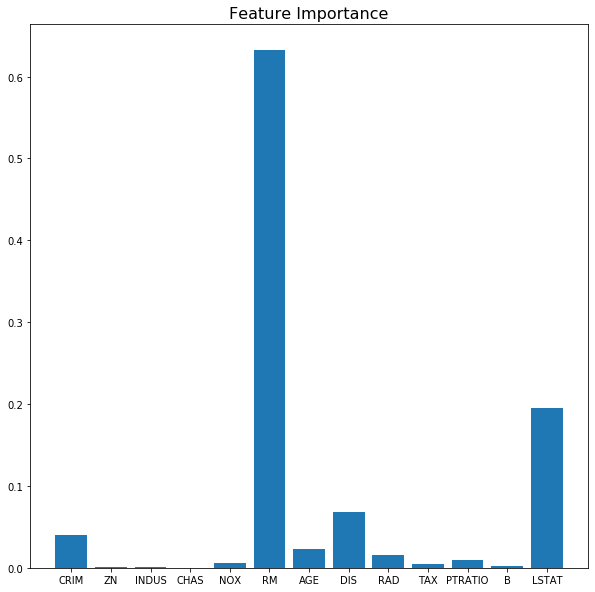

In [11]:
plt.figure(figsize=(10,10))
plt.bar(X_train.columns, boston_tree.feature_importances_)
plt.title('Feature Importance', fontsize=16)

Now we will prune the tree to see if we can improve performance.

There are different Pruning Parameters:

 - max_leaf_nodes: Reduce the number of leaf nodes
 - min_samples_leaf: Restrict the size of sample leaf. Minimum sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total 
 - max_depth: Reduce the depth of the tree to build a generalized tree. Set the depth of the tree to 3, 5, 10 depending after verification on test data

Let's focus on the depth of the tree. We will test different depth thresholds via CV by using the `GridSearchCV` provided by sklearn.

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1,16)}

boston_tree_pruned_cv = GridSearchCV(boston_tree, 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=5 , n_jobs=1, verbose=1)

boston_tree_pruned_cv.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=1, param_grid={'max_depth': range(1, 16)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [13]:
print("Best parameters set found on development set:")
print()
print(boston_tree_pruned_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = boston_tree_pruned_cv.cv_results_['mean_test_score']
stds = boston_tree_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, boston_tree_pruned_cv.cv_results_['params']):
    print("MSE = %0.3f (+/%0.03f) for %r" % (-mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 9}

Grid scores on development set:

MSE = 51.676 (+/16.694) for {'max_depth': 1}
MSE = 29.491 (+/10.384) for {'max_depth': 2}
MSE = 24.546 (+/17.720) for {'max_depth': 3}
MSE = 23.954 (+/20.005) for {'max_depth': 4}
MSE = 23.004 (+/19.699) for {'max_depth': 5}
MSE = 22.983 (+/14.807) for {'max_depth': 6}
MSE = 24.405 (+/22.418) for {'max_depth': 7}
MSE = 26.222 (+/17.584) for {'max_depth': 8}
MSE = 21.989 (+/13.929) for {'max_depth': 9}
MSE = 22.101 (+/13.951) for {'max_depth': 10}
MSE = 24.408 (+/12.766) for {'max_depth': 11}
MSE = 22.974 (+/19.221) for {'max_depth': 12}
MSE = 23.867 (+/19.286) for {'max_depth': 13}
MSE = 25.897 (+/23.162) for {'max_depth': 14}
MSE = 24.141 (+/15.971) for {'max_depth': 15}


Text(0, 0.5, 'MSE')

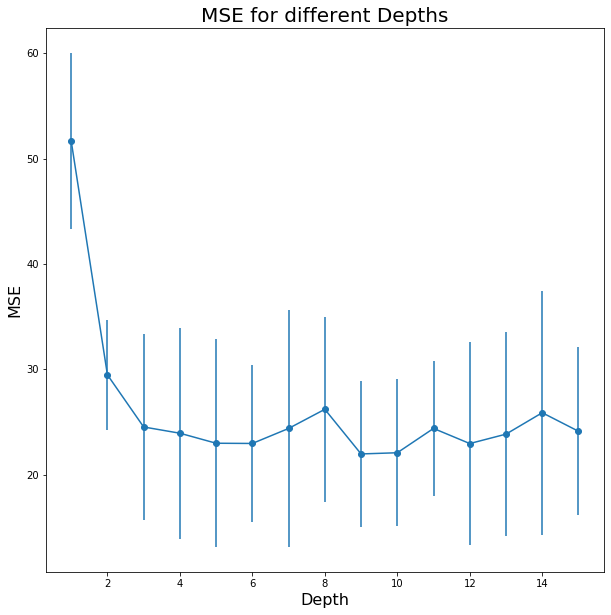

In [14]:
plt.figure(figsize=(10,10))
plt.errorbar(range(1,16,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('MSE for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("MSE", fontsize=16)

As can be seen in the plot, the optimal value for the depth of the decision tree is 9. However, we can find a local optimal at depth 6. Let's prune the tree with this value.

In [15]:
boston_tree_pruned = DecisionTreeRegressor(random_state=42, max_depth=6)
boston_tree_pruned.fit(X_train, y_train)
predictions = boston_tree_pruned.predict(X_test)
print("MSE = {0:.4f}".format(mean_squared_error(y_test, predictions)))

MSE = 25.1772


Great! We have reduced the error with a smaller tree. Let's plot it

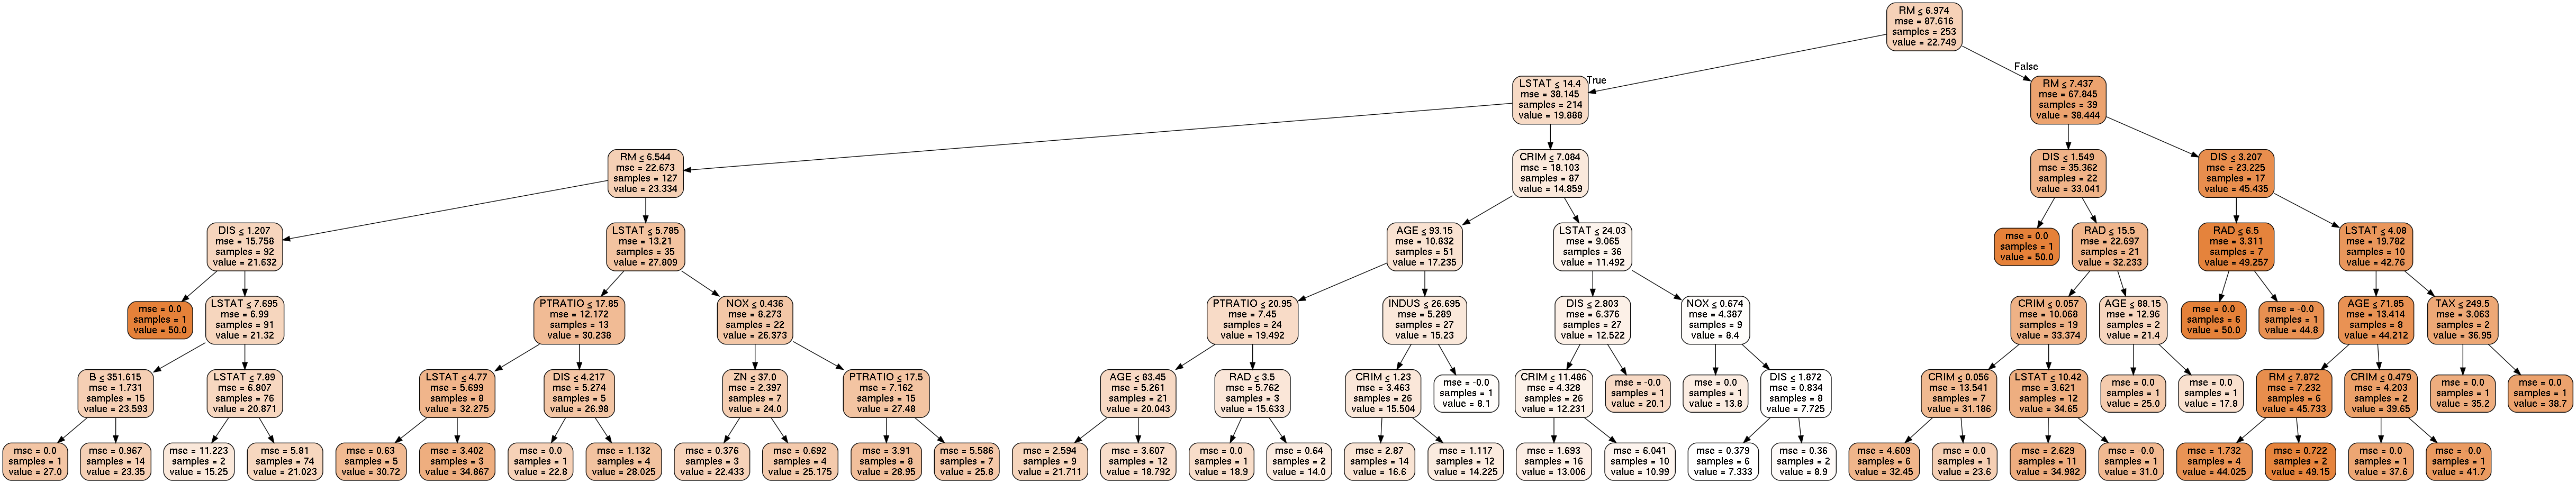

In [16]:
plot_tree(boston_tree_pruned, X_train.columns, "MEDV")

Here we apply bagging and random forests to the Boston data, using the RandomForest function in sklearn. Recall that bagging is simply a special case of a random forest with m = p. Therefore, the RandomForest function can be used to perform both random forests and bagging. We perform bagging:

In [17]:
from sklearn.ensemble import RandomForestRegressor

boston_bagging = RandomForestRegressor(random_state=42, max_features=len(X_train.columns))
boston_bagging.fit(X_train, y_train)
predictions = boston_bagging.predict(X_test)
print("MSE = {0:.4f}".format(mean_squared_error(y_test, predictions)))

MSE = 14.3323


The test set MSE associated with the bagged regression tree is 14, almost half that obtained using an optimally-pruned single tree.

Growing a random forest proceeds in exactly the same way, except that we use a smaller value of the `max_features` argument. Let's try the $sqrt$ of the number of forest


In [18]:
boston_rf = RandomForestRegressor(random_state=42, max_features='sqrt')
boston_rf.fit(X_train, y_train)
predictions = boston_rf.predict(X_test)
print("MSE = {0:.4f}".format(mean_squared_error(y_test, predictions)))

MSE = 12.8946


The performance is even better! As we discussed in class, using less feature allows the process to de-correlate the trees and, consequently, create less overfitted models providing better test performance. Although there is no golden-rule, the $sqrt$ of the number of features is a good starting point.

We can take a look to the feature importance in the following plot.

Text(0.5, 1.0, 'Feature Importance')

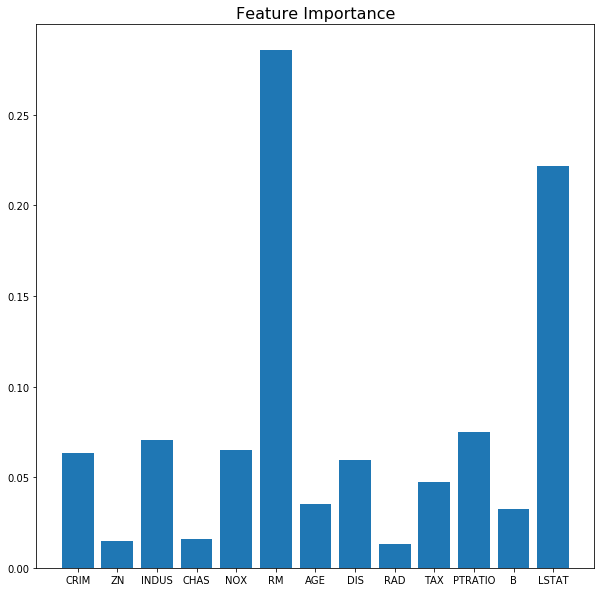

In [19]:
plt.figure(figsize=(10,10))
plt.bar(X_train.columns, boston_rf.feature_importances_)
plt.title('Feature Importance', fontsize=16)

As happened in the single models, `RM` and `LSTAT` are the most important features by far. However, the model consider in a higher degree the rest of them. In other words, the model overfit less to the individual values of these two features.

# Exercise # 2

This problem involves the `OJ` data set.

0. Load and preview the dataset, to understand what is it about.
1. Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.
2. Fit a tree to the training data, with Purchase as the response and the other variables as predictors. 
3. Create a plot of the tree, and interpret the results.
4. Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test accuracy?
5. Apply CV to determine the optimal tree size.
6. Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.
7. Which tree size corresponds to the lowest cross-validated classification error rate?
8. Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation.
10. Compare the accuracy between the pruned and unpruned trees. Which is higher?

#### 0. Load and preview the dataset, to understand what is it about.

In [20]:
import io
import requests

OJ=pd.read_csv("https://raw.githubusercontent.com/jcrouser/islr-python/master/data/OJ.csv", index_col=0)
OJ.head(5)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


#### 1. Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.


#### 2. Fit a tree to the training data, with Purchase as the response and the other variables as predictors.

#### 3. Create a plot of the tree, and interpret the results.


#### 4. Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test accuracy?


#### 5. Apply CV to determine the optimal tree size.

#### 6. Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

#### 7. Which tree size corresponds to the lowest cross-validated classification error rate?


#### 8. Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation.

#### 10. Compare the accuracy between the pruned and unpruned trees. Which is higher?

# Exercise 3

Try to solve the **Exercise #2** with Boosting trees by playing around with the `xgboost`(https://xgboost.readthedocs.io/en/latest/python/python_intro.html) library. 